

---



# **Task**
Hãy sử dụng dữ liệu được cung cấp dưới đây (dữ liệu giá và khối
lượng của một vài mã cổ phiếu) để xây dựng một số mô hình dự đoán biến
động giá cổ phiếu.

Biến động giá cổ phiếu = Giá cổ phiếu N (phút hoặc giờ hoặc ngày) sau - Giá cổ phiếu hiện tại.

Bạn hãy phân tích và tìm mô hình dự đoán biến động giá
Có 4 files dữ liệu của các công ty. Hãy nêu cho tôi chúng ta cần phải làm những bước gì thật chi tiết, và mục đích của từng bước dưới góc độ của 1 data analyst/data scientist về chứng khoán, sau đó hãy code

Dataset:
"PNJ.csv"
"MSN.csv"
"FPT.csv"
"VIC.csv"



---



## **Import thư viện và dữ liệu**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## **Data loader**


---


> *Load the stock price data for PNJ, MSN, FPT, and VIC from the provided CSV files.*


In [3]:
# Import the path of .csv files
df_pnj = pd.read_csv('stock_dataset/PNJ.csv')
df_msn = pd.read_csv('stock_dataset/MSN.csv')
df_fpt = pd.read_csv('stock_dataset/FPT.csv')
df_vic = pd.read_csv('stock_dataset/VIC.csv')

display(df_pnj.head())
display(df_msn.head())
display(df_fpt.head())
display(df_vic.head())

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2/28/2018 9:15,78.14,78.99,78.14,78.99,270,0
1,PNJ,2/28/2018 9:16,78.94,78.94,78.94,78.94,10,0
2,PNJ,2/28/2018 9:19,78.14,78.14,78.14,78.14,283,0
3,PNJ,2/28/2018 9:20,78.14,78.14,78.14,78.14,480,0
4,PNJ,2/28/2018 9:21,78.14,78.14,78.14,78.14,146,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,12/25/2017 9:15,73.1,73.1,73.1,73.1,4210,0
1,MSN,12/25/2017 9:16,73.0,73.0,73.0,73.0,5000,0
2,MSN,12/25/2017 9:18,73.5,73.5,73.5,73.5,210,0
3,MSN,12/25/2017 9:20,73.2,73.5,73.1,73.1,2050,0
4,MSN,12/25/2017 9:21,73.0,73.0,73.0,73.0,1380,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,12/25/2018 9:15,30.89,30.89,30.89,30.89,35410,0
1,FPT,12/25/2018 9:16,30.81,30.81,30.81,30.81,190,0
2,FPT,12/25/2018 9:17,30.74,30.81,30.74,30.74,1120,0
3,FPT,12/25/2018 9:18,30.74,30.74,30.74,30.74,2120,0
4,FPT,12/25/2018 9:19,30.74,30.74,30.74,30.74,22500,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,10/17/2018 9:39,98.5,98.5,98.5,98.5,390,0
1,VIC,10/17/2018 9:40,98.5,98.5,98.5,98.5,760,0
2,VIC,10/17/2018 9:41,98.6,98.6,98.6,98.6,2060,0
3,VIC,10/17/2018 9:42,98.6,98.6,98.6,98.6,5540,0
4,VIC,10/17/2018 9:43,98.6,98.7,98.6,98.7,760,0


## **Khai phá(EDA) và phân tích(Data Analysis)**


In [4]:
# Convert to datetime format
for df in [df_pnj, df_msn, df_fpt, df_vic]:
    try:
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
    except KeyError:
        print(f"Column 'Date/Time' not found in one of the dataframes.")
    except ValueError:
        print(f"Failed to convert 'Date/Time' to datetime in one of the dataframes.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

display(df_pnj.head())
display(df_msn.head())
display(df_fpt.head())
display(df_vic.head())

,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,PNJ,2018-02-28 09:15:00,78.14,78.99,78.14,78.99,270,0
1,PNJ,2018-02-28 09:16:00,78.94,78.94,78.94,78.94,10,0
2,PNJ,2018-02-28 09:19:00,78.14,78.14,78.14,78.14,283,0
3,PNJ,2018-02-28 09:20:00,78.14,78.14,78.14,78.14,480,0
4,PNJ,2018-02-28 09:21:00,78.14,78.14,78.14,78.14,146,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,MSN,2017-12-25 09:15:00,73.1,73.1,73.1,73.1,4210,0
1,MSN,2017-12-25 09:16:00,73.0,73.0,73.0,73.0,5000,0
2,MSN,2017-12-25 09:18:00,73.5,73.5,73.5,73.5,210,0
3,MSN,2017-12-25 09:20:00,73.2,73.5,73.1,73.1,2050,0
4,MSN,2017-12-25 09:21:00,73.0,73.0,73.0,73.0,1380,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,FPT,2018-12-25 09:15:00,30.89,30.89,30.89,30.89,35410,0
1,FPT,2018-12-25 09:16:00,30.81,30.81,30.81,30.81,190,0
2,FPT,2018-12-25 09:17:00,30.74,30.81,30.74,30.74,1120,0
3,FPT,2018-12-25 09:18:00,30.74,30.74,30.74,30.74,2120,0
4,FPT,2018-12-25 09:19:00,30.74,30.74,30.74,30.74,22500,0


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest
0,VIC,2018-10-17 09:39:00,98.5,98.5,98.5,98.5,390,0
1,VIC,2018-10-17 09:40:00,98.5,98.5,98.5,98.5,760,0
2,VIC,2018-10-17 09:41:00,98.6,98.6,98.6,98.6,2060,0
3,VIC,2018-10-17 09:42:00,98.6,98.6,98.6,98.6,5540,0
4,VIC,2018-10-17 09:43:00,98.6,98.7,98.6,98.7,760,0


In [5]:
df_company = [df_pnj, df_msn, df_fpt, df_vic]
company_name = ['PNJ', 'MSN', 'FPT', 'VIC']

In [6]:
# Data Shape and Information
for df, name in zip(df_company, company_name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    display(df.info())
    print("-" * 50)
    print ("\n")

--- PNJ ---
Shape: (125309, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125309 entries, 0 to 125308
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         125309 non-null  object        
 1   Date/Time      125309 non-null  datetime64[ns]
 2   Open           125309 non-null  float64       
 3   High           125309 non-null  float64       
 4   Low            125309 non-null  float64       
 5   Close          125309 non-null  float64       
 6   Volume         125309 non-null  int64         
 7   Open Interest  125309 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 7.6+ MB


None

--------------------------------------------------


--- MSN ---
Shape: (135354, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135354 entries, 0 to 135353
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         135354 non-null  object        
 1   Date/Time      135354 non-null  datetime64[ns]
 2   Open           135354 non-null  float64       
 3   High           135354 non-null  float64       
 4   Low            135354 non-null  float64       
 5   Close          135354 non-null  float64       
 6   Volume         135354 non-null  int64         
 7   Open Interest  135354 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 8.3+ MB


None

--------------------------------------------------


--- FPT ---
Shape: (97406, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97406 entries, 0 to 97405
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Ticker         97406 non-null  object        
 1   Date/Time      97406 non-null  datetime64[ns]
 2   Open           97406 non-null  float64       
 3   High           97406 non-null  float64       
 4   Low            97406 non-null  float64       
 5   Close          97406 non-null  float64       
 6   Volume         97406 non-null  int64         
 7   Open Interest  97406 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 5.9+ MB


None

--------------------------------------------------


--- VIC ---
Shape: (101266, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101266 entries, 0 to 101265
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Ticker         101266 non-null  object        
 1   Date/Time      101266 non-null  datetime64[ns]
 2   Open           101266 non-null  float64       
 3   High           101266 non-null  float64       
 4   Low            101266 non-null  float64       
 5   Close          101266 non-null  float64       
 6   Volume         101266 non-null  int64         
 7   Open Interest  101266 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 6.2+ MB


None

--------------------------------------------------




In [7]:
# Descriptive Statistics
for df, name in zip(df_company, company_name):
    print(f"--- {name} ---")
    display(df[['Close', 'Volume']].describe())
    print("-" * 50)
    print("\n")

--- PNJ ---


,Close,Volume
count,125309.000000,125309.000000
mean,72.179371,3031.830451
std,9.899401,7248.952968
min,44.140000,1.000000
25%,64.600000,220.000000
50%,72.830000,1000.000000
75%,80.160000,3130.000000
max,100.160000,580730.000000


--------------------------------------------------


--- MSN ---


,Close,Volume
count,135354.000000,1.353540e+05
mean,74.880759,5.683578e+03
std,15.418857,2.798513e+04
min,46.400000,1.000000e+01
25%,57.800000,5.000000e+02
50%,79.100000,2.000000e+03
75%,86.000000,5.560000e+03
max,118.000000,3.300680e+06


--------------------------------------------------


--- FPT ---


,Close,Volume
count,97406.000000,9.740600e+04
mean,45.071631,8.044173e+03
std,6.359799,1.753203e+04
min,30.250000,1.000000e+01
25%,39.740000,7.500000e+02
50%,46.950000,2.960000e+03
75%,49.200000,8.960000e+03
max,58.400000,1.255930e+06


--------------------------------------------------


--- VIC ---


,Close,Volume
count,101266.000000,1.012660e+05
mean,105.378791,3.182640e+03
std,11.545054,1.469814e+04
min,68.000000,1.000000e+01
25%,95.400000,2.300000e+02
50%,105.300000,1.020000e+03
75%,115.800000,3.000000e+03
max,126.500000,1.468390e+06


--------------------------------------------------




In [8]:
# Check missing Values
for df, name in zip(df_company, company_name):
    print(f"--- {name} ---")
    display(df.isnull().sum())
    print("-" * 20)

--- PNJ ---


,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


--------------------
--- MSN ---


,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


--------------------
--- FPT ---


,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


--------------------
--- VIC ---


,0
Ticker,0
Date/Time,0
Open,0
High,0
Low,0
Close,0
Volume,0
Open Interest,0


--------------------




---



### **Volumes/Close changes over periods of time**

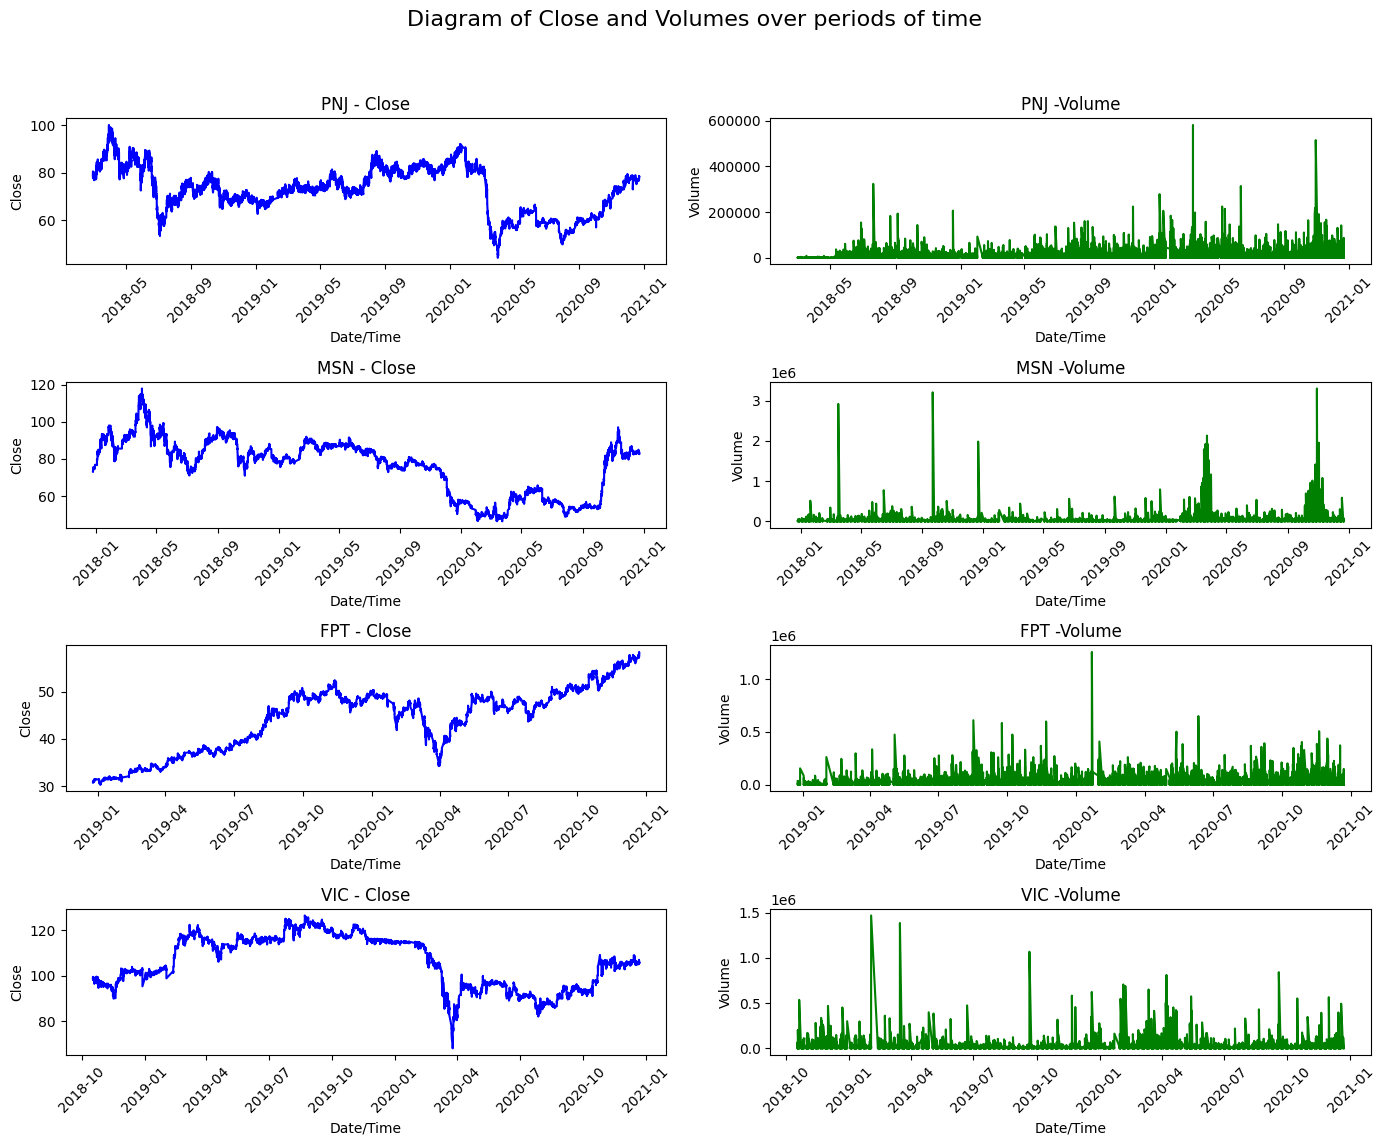

In [9]:
# Visualization changes to volume over the course of time
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12), sharex=False)
fig.suptitle('Diagram of Close and Volumes over periods of time', fontsize=16)

for i, (df, name) in enumerate(zip(df_company, company_name)):
    # Close Price
    sns.lineplot(ax=axes[i, 0], x='Date/Time', y='Close', data=df, color='blue')
    axes[i, 0].set_title(f'{name} - Close')
    axes[i, 0].set_ylabel('Close')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Volume
    sns.lineplot(ax=axes[i, 1], x='Date/Time', y='Volume', data=df, color='green')
    axes[i, 1].set_title(f'{name} -Volume')
    axes[i, 1].set_ylabel('Volume')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

**📊 Nhận xét tổng thể:**


---


1. PNJ
* Close:
  * Biến động mạnh từ 2018 đến giữa 2020.
  * Có giai đoạn sụt giảm kéo dài (cuối 2019 - giữa 2020), phản ánh tác động tiêu cực (có thể từ COVID-19).
  * Sau đó phục hồi nhẹ trong nửa cuối 2020.

* Volume:
  * Tăng dần theo thời gian.
  * Có nhiều đợt giao dịch đột biến (***volume spike***), với mốc đỉnh là ở giai đoạn cuối 2019 - đầu 2020 như đã kể trên. Điều này cho thấy PNJ được nhà đầu tư quan tâm ở thời điểm cụ thể.

→ Nhận định: PNJ có tính chu kỳ và tương đối ổn định. Tuy nhiên, vẫn cần lưu ý ***volume spike*** để đánh giá momentum.

2. MSN
* Giá Close:
  * Mức giá dao động rộng, nhiều đợt tăng – giảm mạnh, đặc biệt từ cuối 2019 đến 2020.
  * Biến động lớn, nhưng phục hồi tốt cuối 2020.

* Volume:
  * Có nhiều thời điểm khối lượng giao dịch cực cao (đỉnh vượt 3 triệu), đặc biệt giai đoạn biến động giá mạnh.
  * Volume tăng mạnh vào thời kỳ phục hồi → xác nhận xu hướng tăng.

→ Nhận định: MSN là cổ phiếu có độ biến động(volatility) khá cao.

3. FPT
* Close:
  * Tăng trưởng khá ổn định theo thời gian → biểu hiện xu hướng tăng dài hạn.
  * Có một vài thời điểm điều chỉnh mạnh nhưng nhanh chóng phục hồi.

* Volume:
  * Tương đối đều, không quá đột biến nhưng ổn định.
  * Có vài đợt khối lượng cao trùng với giai đoạn điều chỉnh giá.

→ Nhận định: FPT có xu hướng tăng trưởng bền vững, ít biến động đột ngột.

4. VIC
* Close:
  * Biến động khá lớn, đặc biệt cú rơi mạnh đầu năm 2020 (rất có thể do COVID-19).
  * Sau đó hồi phục dần nhưng chưa trở lại đỉnh cũ.

* Volume:
  * Volume biến động mạnh và không ổn định.
  *  Có nhiều điểm spike nhưng không luôn tương ứng rõ ràng với xu hướng giá → cho thấy hành vi nhà đầu tư khó đoán.

→ Nhận định: VIC có rủi ro cao hơn, biến động giá khó lường. Volume không xác nhận xu hướng rõ ràng, cần thận trọng khi xây dựng mô hình dự đoán biến động giá cổ phiếu.



---
> * *Nhìn chung, giá đóng cổ phiếu (Closed) và khối lượng cổ phiếu(Volume) được "changes hands" chứng kiến sự biến động mạnh mẽ nhất vào thời điểm cuối năm 2019- đầu năm 2020. Chú ý ở đây, trong giai  đoạn này, giá cổ phiếu giảm sâu thế nhưng khối lượng giao dịch tăng mạnh.*

> * *Một nguyên nhân có thể được dùng để lý giải cho sự biến động bất thường này xuất phát từ thời điểm bùng phát dịch bệnh covid-19. Chính sự khủng hoảng kinh tế gây ra bởi covid trong thời điểm này đã khiến gía cổ phiếu giảm mạnh, dẫn đến:*
  * *Tâm lý hoảng loạn: Nhiều nhà đầu tư bán tháo cổ phiếu để cắt lỗ hoặc rút khỏi thị trường.*
  * *Sự tham gia của dòng tiền lớn: Các nhà đầu tư tổ chức hoặc cá nhân có tiềm lực tài chính mạnh bắt đầu mua vào với kỳ vọng giá sẽ phục hồi trong tương lai.*


---



### **Distribution Analysis**

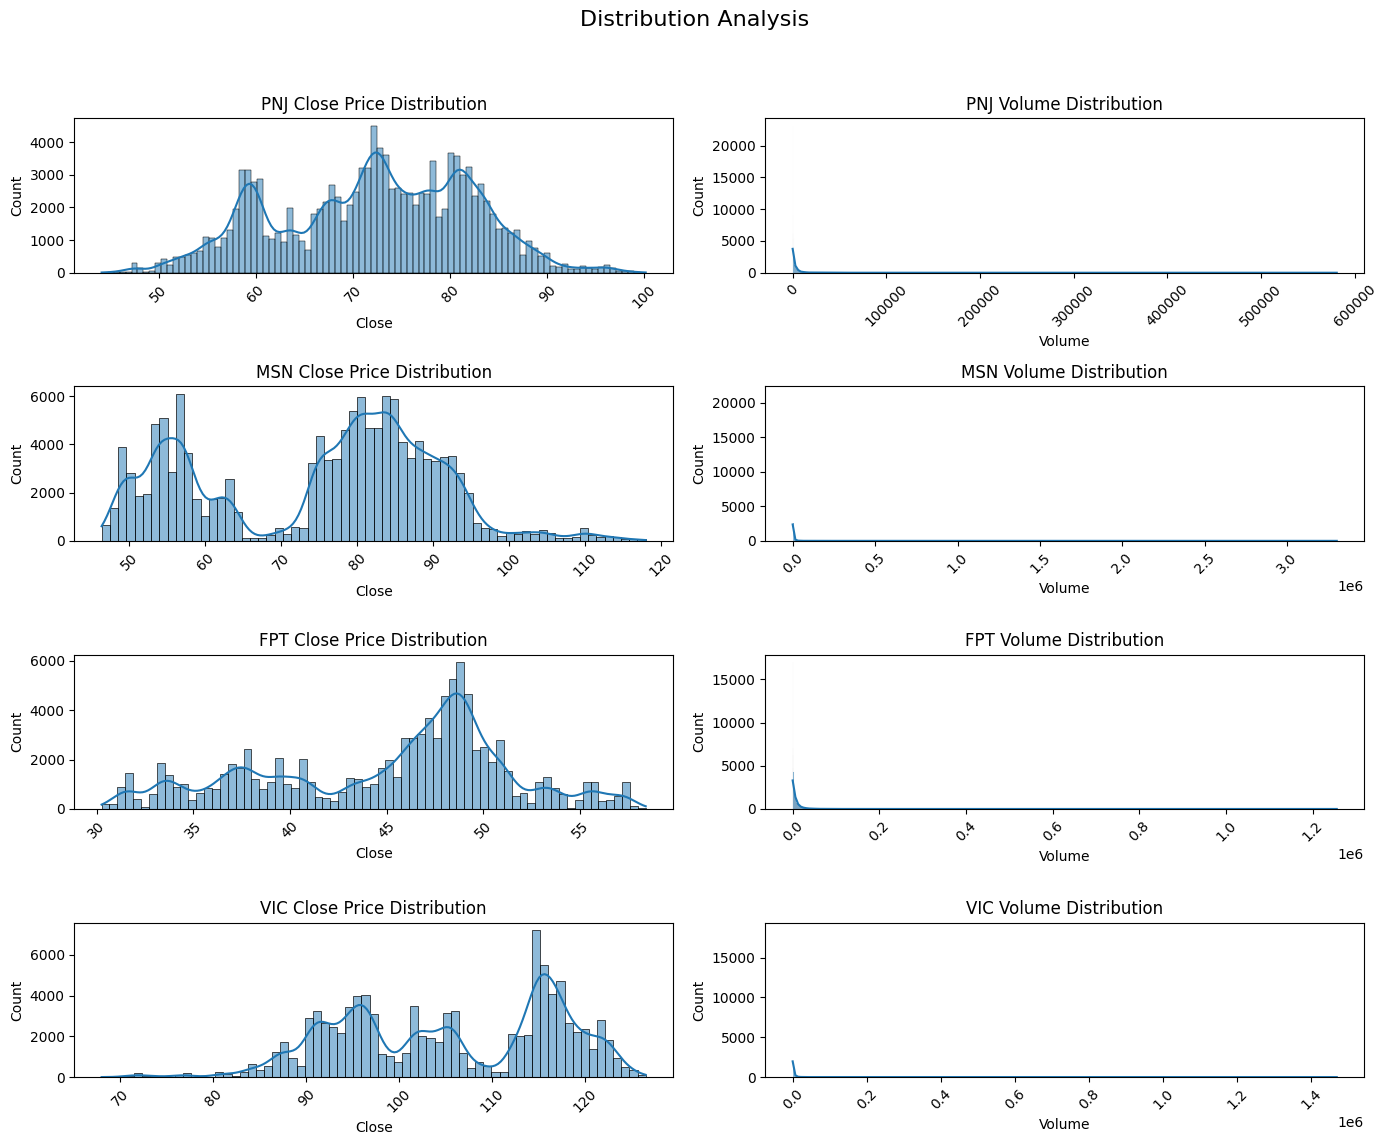

In [10]:
# Distribution Analysis
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(14, 12), sharex=False)
fig.suptitle('Distribution Analysis', fontsize=16)

for i, (df,name) in enumerate(zip(df_company, company_name)):
    # Close Distribution
    sns.histplot(ax=axes[i,0], data=df['Close'], kde=True)
    axes[i, 0].set_title(f'{name} Close Price Distribution')
    axes[i, 0].set_xlabel('Close')
    axes[i, 0].set_ylabel('Count')
    axes[i, 0].tick_params(axis='x', rotation=45)

    # Volume distribution
    sns.histplot(ax=axes[i,1], data=df['Volume'], kde=True)
    axes[i, 1].set_title(f'{name} Volume Distribution')
    axes[i, 1].set_xlabel('Volume')
    axes[i, 1].set_ylabel('Count')
    axes[i, 1].tick_params(axis='x', rotation=45)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

📊 Tổng quan biểu đồ (Histogram + KDE)


---

* **Phân phối giá đóng cửa(Close):**
  * *Không mã(công ty) nào có phân phối chuẩn. Phân phối bất đối xứng, có đuôi khá dài (về bên phải hoặc trái tùy mã). Đây là hiện tượng outliers*
  * *Outliers thường nằm ở đuôi phân phối, biểu diễn cho các mức giá trị cực trị.*

* **Phân phối khối lượng giao dịch (Volume):**
  * *Đều có phân phối lệch phải lớn(right-skewed).*
  * *Phần lớn phiên có volume thấp, nhưng có một số phiên đột biến khối lượng rất cao (outliers rõ ràng).*



---

 * **Sự hiện diện của outliers trong dữ liệu có thể ảnh hưởng đáng kể đến hiệu quả của mô hình học máy dự đoán giá cổ phiếu. Outliers có thể làm lệch phân phối dữ liệu, gây ra hiện tượng overfitting, hay các kỹ thuật tiền xử lý như MinMaxScaler.**
 * **Tuy nhiên, outliers cũng có thể có những thông tin hữu ích, khi thị trường luôn biến động, và việc để mô hình chúng ta học được các outliers "ghi lại" các dữ liệu quan trọng về những biến cố thị trường là cần thiết.**


---


  > Tất cả volume đều có outliers rõ → ảnh hưởng đến scale nếu không xử lý.

  > Close cũng có outliers, nhưng thường là một phần của biến động tự nhiên – chỉ nên xử lý nếu biết chắc là lỗi.


---



### **Moving average (MA) of various company stocks**

*Cho chúng ta biết được sự thay đổi giá cổ phiếu trung bình sau mỗi chu kỳ (10/20/50 ngày).*


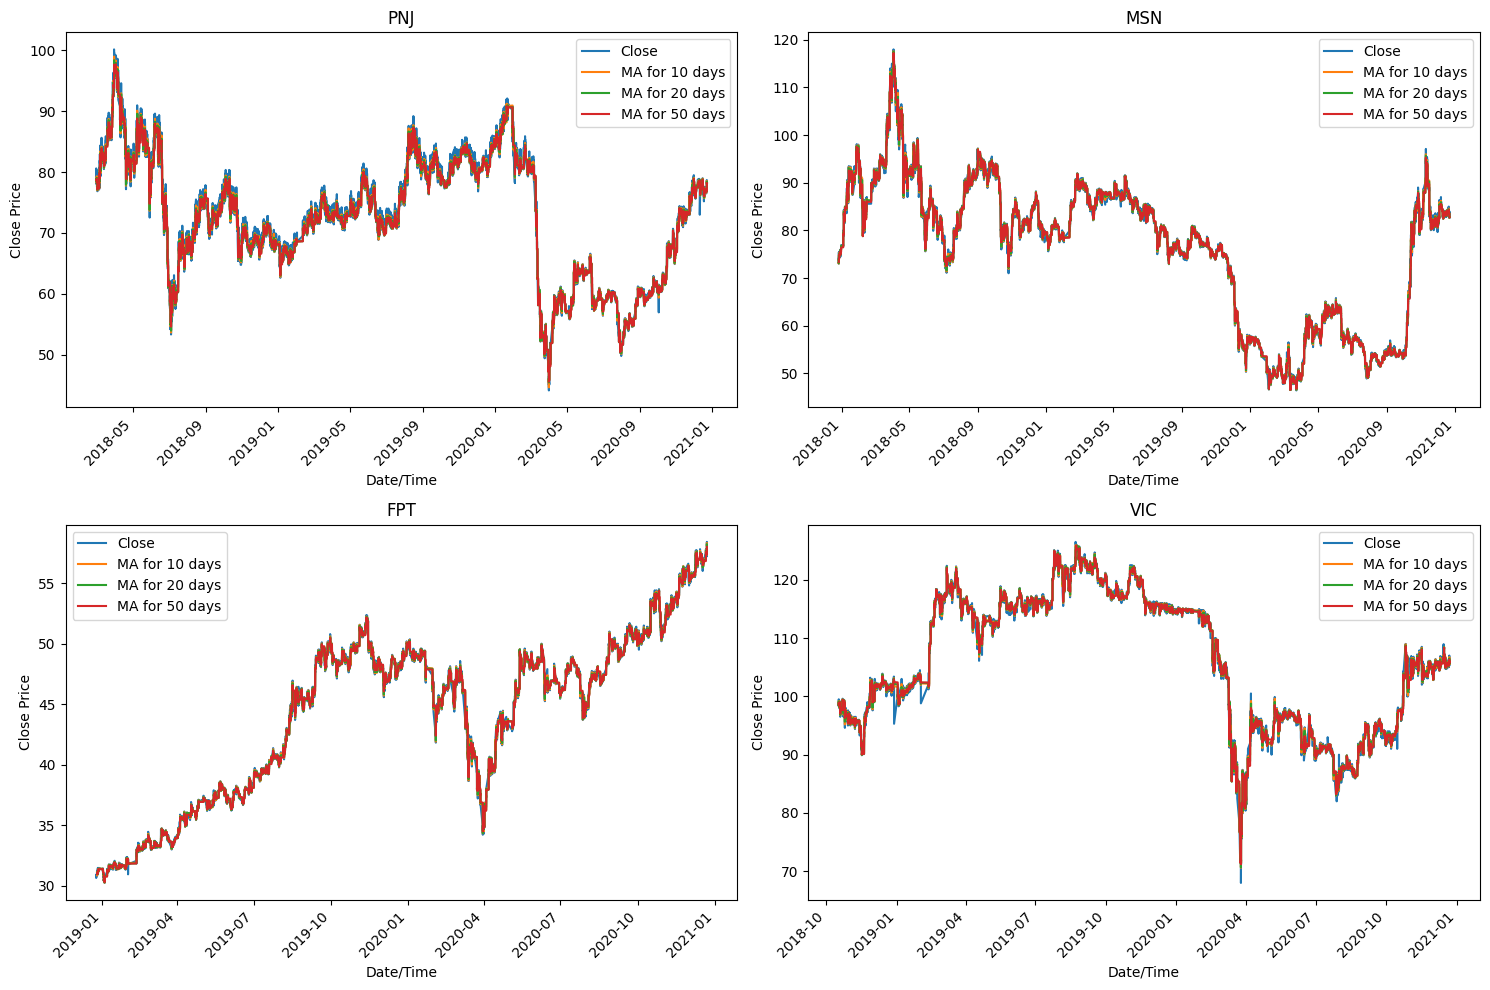

In [11]:
# Calculate moving averages
ma_day = [10, 20, 50]
for ma in ma_day:
    for company, name in zip(df_company, company_name):
        column_name = f"MA for {ma} days"
        company[column_name] = company['Close'].rolling(ma).mean()

# Plotting
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))  # Adjust figsize as needed

for i, (company, name) in enumerate(zip(df_company, company_name)):
    row = i // 2
    col = i % 2
    company.plot(x='Date/Time', y=['Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days'],
                  ax=axes[row, col])
    axes[row, col].set_title(name)
    axes[row, col].set_xlabel('Date/Time')
    axes[row, col].set_ylabel('Close Price')
    axes[row, col].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


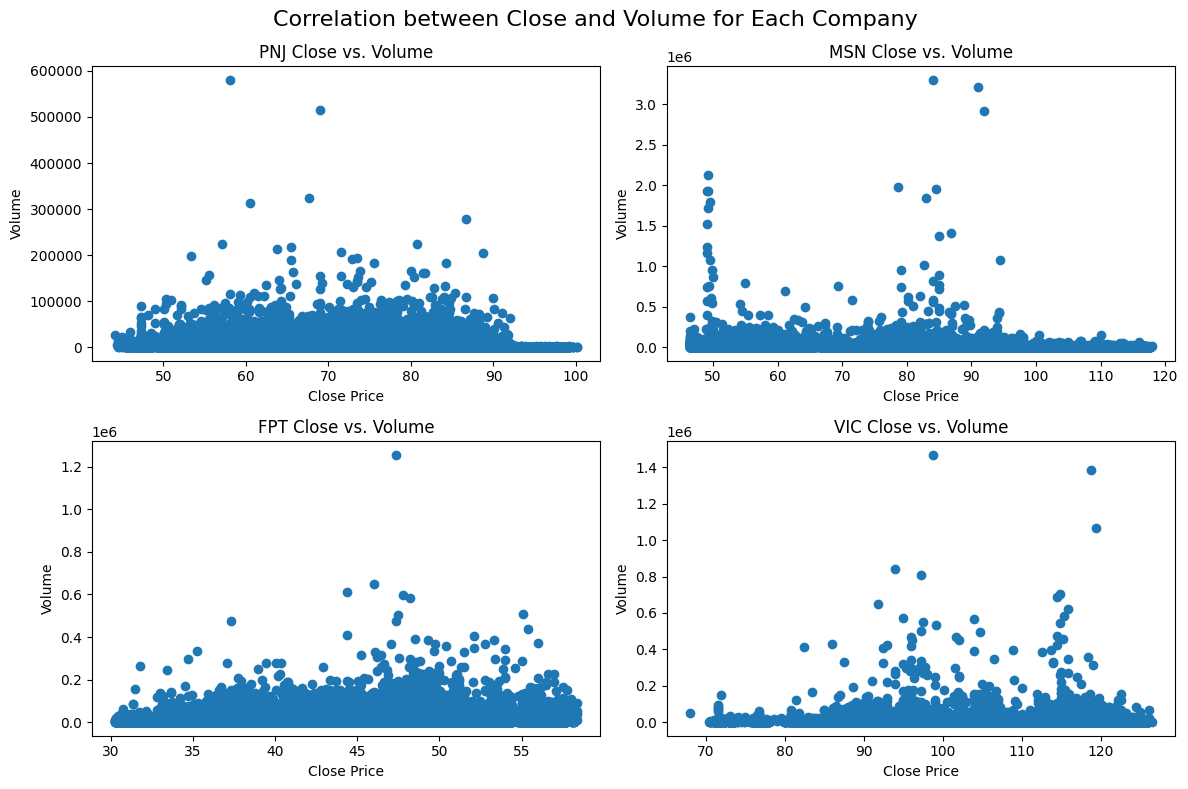

In [12]:
# Correlation Analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Correlation between Close and Volume for Each Company', fontsize=16)

for i, (df, name) in enumerate(zip(df_company, company_name)):
    row = i // 2
    col = i % 2

    correlation = df['Close'].corr(df['Volume'])
    # print(f"--- {name} ---")
    # print(f"Correlation between Close and Volume: {correlation}")

    axes[row, col].scatter(df['Close'], df['Volume'])
    axes[row, col].set_title(f'{name} Close vs. Volume')  # Set title
    axes[row, col].set_xlabel('Close Price')  # x-axis label
    axes[row, col].set_ylabel('Volume')  # y-axis label

plt.tight_layout()  # Adjust subplot layout
plt.show()  # Display the plot

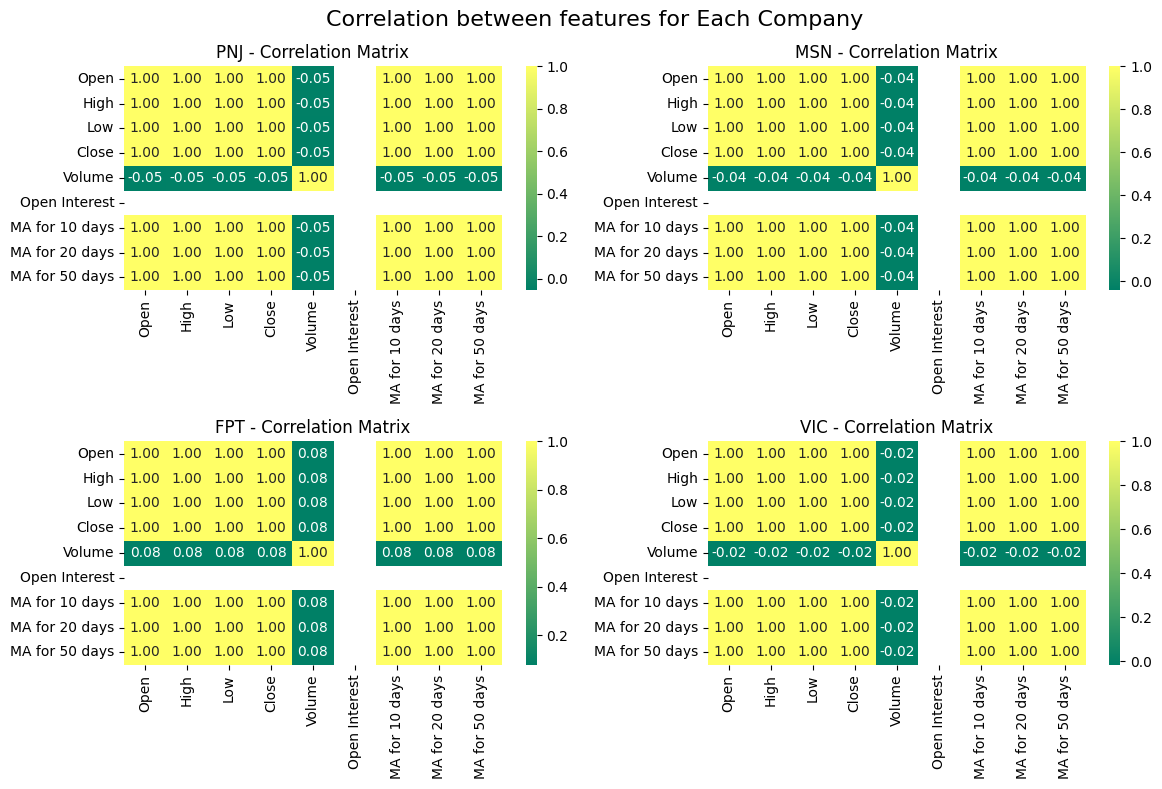

In [13]:
# Correlation Analysis
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
fig.suptitle('Correlation between features for Each Company', fontsize=16)

for i, (df, name) in enumerate(zip(df_company, company_name)):
    row = i // 2
    col = i % 2

    correlation = df['Close'].corr(df['Volume'])
    # print(f"--- {name} ---")
    # print(f"Correlation between Close and Volume: {correlation}")

    #  correlation among features for each individual companies
    correlation_matrix= df.drop(['Ticker', 'Date/Time'], axis=1).corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='summer', fmt='.2f', ax=axes[row, col])
    axes[row, col].set_title(f'{name} - Correlation Matrix')

plt.tight_layout()
plt.show()  # Display the plot

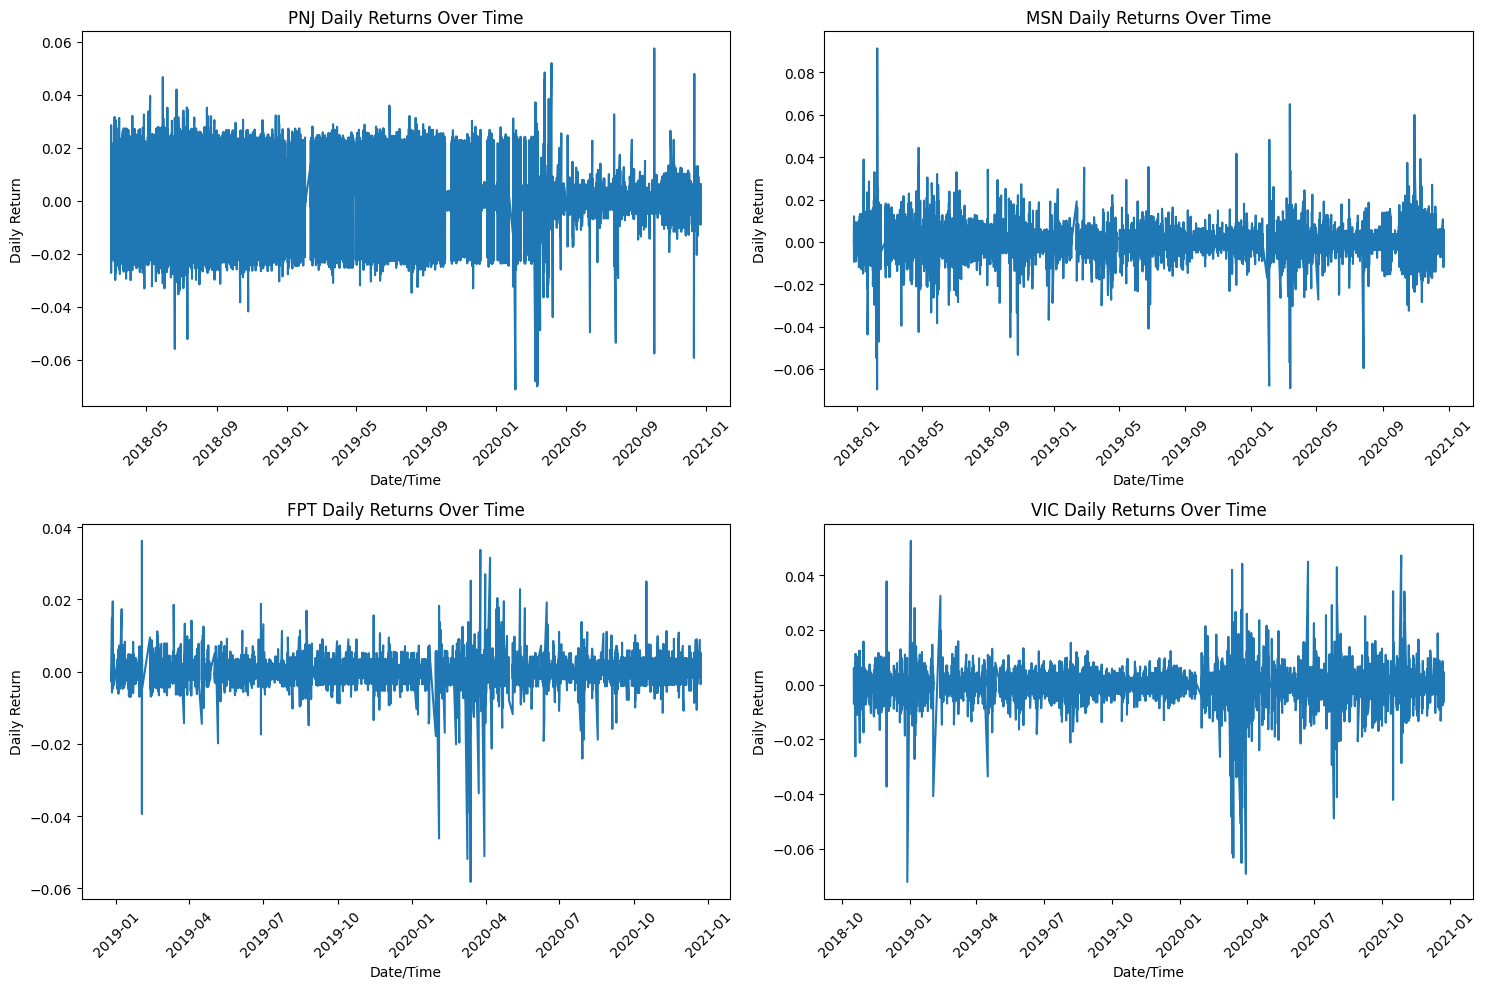

In [14]:
# Calculate daily returns for each company
for company, name in zip(df_company, company_name):
    company['Daily Return'] = company['Close'].pct_change()

# Plotting daily returns over time
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

for i, (company, name) in enumerate(zip(df_company, company_name)):
    row = i // 2
    col = i % 2

    # Plotting daily returns against Date/Time
    sns.lineplot(ax=axes[row, col], x='Date/Time', y='Daily Return', data=company)
    axes[row, col].set_title(f'{name} Daily Returns Over Time')
    axes[row, col].set_xlabel('Date/Time')
    axes[row, col].set_ylabel('Daily Return')
    axes[row, col].tick_params(axis='x', rotation=45)

fig.tight_layout()
plt.show()


📌 **Tổng kết:**


---

> 🎯 1. Biến động gia tăng trong giai đoạn khủng hoảng (2020).

Tất cả các biểu đồ đều có những “đuôi” dài rõ rệt vào đầu năm 2020 – đây là dấu hiệu điển hình của giai đoạn thị trường bất ổn do COVID-19.

  * PNJ có nhiều phiên daily return rơi xuống dưới -6% và tăng lên trên +5%.
  * MSN dao động lên đến gần ±8%.
  * VIC và FPT cũng giảm sâu, tuy không cực đoan bằng MSN.

⟶ Kết luận: Độ biến động cao hơn trong khủng hoảng là điều bình thường, nhưng các mô hình học máy cần chú ý để tránh bị "overwhelmed" bởi outlier.


> 📈 2. Mức độ ổn định của từng cổ phiếu.

Dựa trên mật độ và độ dày dao động:
  * FPT có biểu đồ returns "hẹp" và dao động khá ổn định (trung bình daily return nhỏ, biến động thấp hơn). Điều này phù hợp với đặc điểm FPT là một cổ phiếu tăng trưởng ổn định, ít bị đầu cơ.
  * MSN là cổ phiếu có vẻ biến động mạnh nhất: biên độ daily return lớn, đặc biệt là nhiều phiên đột biến mạnh.
  * VIC và PNJ có mức biến động trung bình nhưng đôi lúc có những biến động thất thường xảy ra, do đó cần phải chú ý. Đặc biệt, ở VIC, những biến động về giá cố phiếu xáy ra thường xuyên hơn, và có sự sụt giảm tương đối lớn. Do đó, cần cẩn thận trong việc đầu tư vào cổ phiếu VIC, vì thường xuyên có những giai đoạn rớt giá không lường trước.

> 🧠 3. Tính chu kỳ và xu hướng trong biến động.

  * Không rõ ràng có chu kỳ theo tháng/tuần, nhưng vẫn có những cụm volatility: nhiều phiên dao động mạnh liên tiếp (có thể là vùng tích lũy hay phân phối).
  * Nên xem xét liệu các “cụm biến động” này có trùng với ngày giao dịch nhiều hay thời điểm công bố tin tức.

> 💡 4. Sự bất đối xứng trong phản ứng tăng và giảm.

  * Có vẻ như các phiên giảm mạnh hơn phiên tăng (tail bên dưới dài hơn tail bên trên), nhất là PNJ, MSN.

---



## **Data preprocess/clean**


In [13]:
# Load + read dataset
df_pnj = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_dataset/PNJ.csv')
df_msn = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_dataset/MSN.csv')
df_fpt = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_dataset/FPT.csv')
df_vic = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/stock_dataset/VIC.csv')

# Convert to datetime format
for df in [df_pnj, df_msn, df_fpt, df_vic]:
    try:
        df['Date/Time'] = pd.to_datetime(df['Date/Time'])
        df.sort_values('Date/Time', inplace=True)
    except KeyError:
        print(f"Column 'Date/Time' not found in one of the dataframes.")
    except ValueError:
        print(f"Failed to convert 'Date/Time' to datetime in one of the dataframes.")
    except Exception as e:
        print(f"An unexpected error occurred: {e}")

# List of company datasets and names.
df_company = [df_pnj, df_msn, df_fpt, df_vic]
company_name = ['PNJ', 'MSN', 'FPT', 'VIC']



---


> * Ở bước này, ta sẽ tiến hành xử lý outliers trước khi đưa vào mô hình. Tập trung vào outliers của cột giá cuối(Close) và cột khối lượng(Volume), nơi, như đã phân tích ở trên, có nhiều outliers.
> * Để tiến hành xử lý ngoại lệ và dữ liệu bất thường, ta sử dụng:
  * Với outliers Volume: Thay thế Volume bằng log(Volume+1) (thêm 1 để tránh log(0)). Biến đổi log sẽ nén các giá trị khối lượng lớn, giảm ảnh hưởng quá mức của chúng.
  * Với outlier Close và Volume: **winsorize** dữ liệu để cắt các giá trị quá cực đoan về percentiles 1% và 99%.

--- PNJ ---
Descriptive Statistics after cleaning:


,Close,Volume
count,125309.00000,125309.000000
mean,72.17210,6.643663
std,9.79412,1.906875
min,50.80000,2.302585
25%,64.60000,5.398163
50%,72.83000,6.908755
75%,80.16000,8.049108
max,92.82000,10.265008


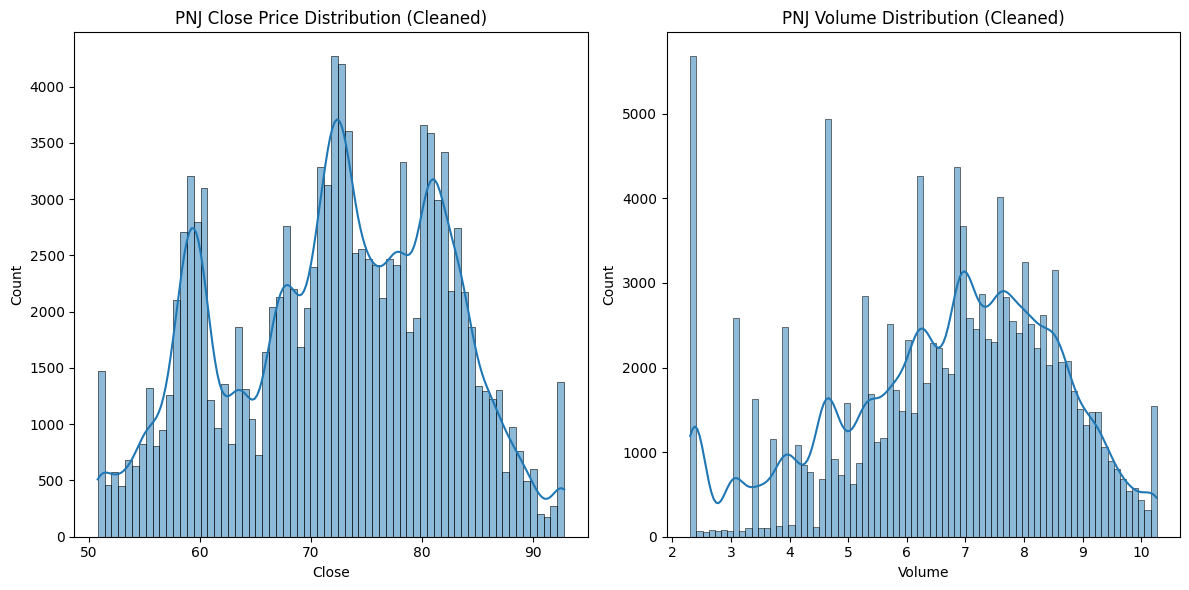

--- MSN ---
Descriptive Statistics after cleaning:


,Close,Volume
count,135354.000000,135354.000000
mean,74.863905,7.287342
std,15.344682,1.889072
min,48.250000,2.397895
25%,57.800000,6.216606
50%,79.100000,7.601402
75%,86.000000,8.623533
max,109.700000,10.807821


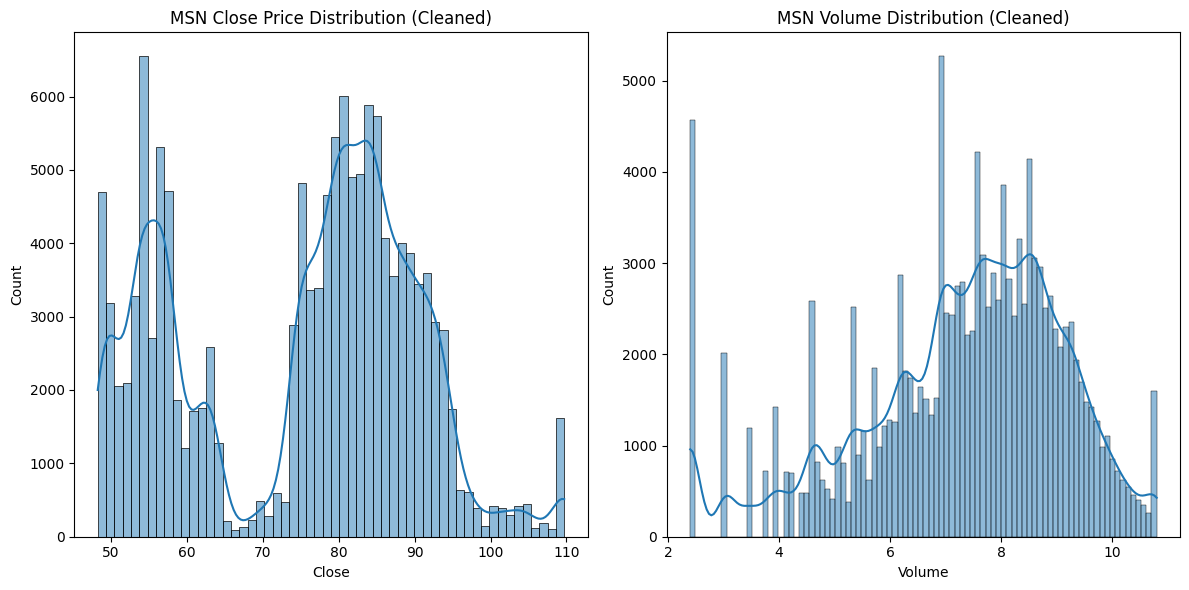

--- FPT ---
Descriptive Statistics after cleaning:


,Close,Volume
count,97406.000000,97406.000000
mean,45.073719,7.666742
std,6.349405,1.953209
min,31.340000,2.397895
25%,39.740000,6.621406
50%,46.950000,7.993282
75%,49.200000,9.100637
max,57.300000,11.220499


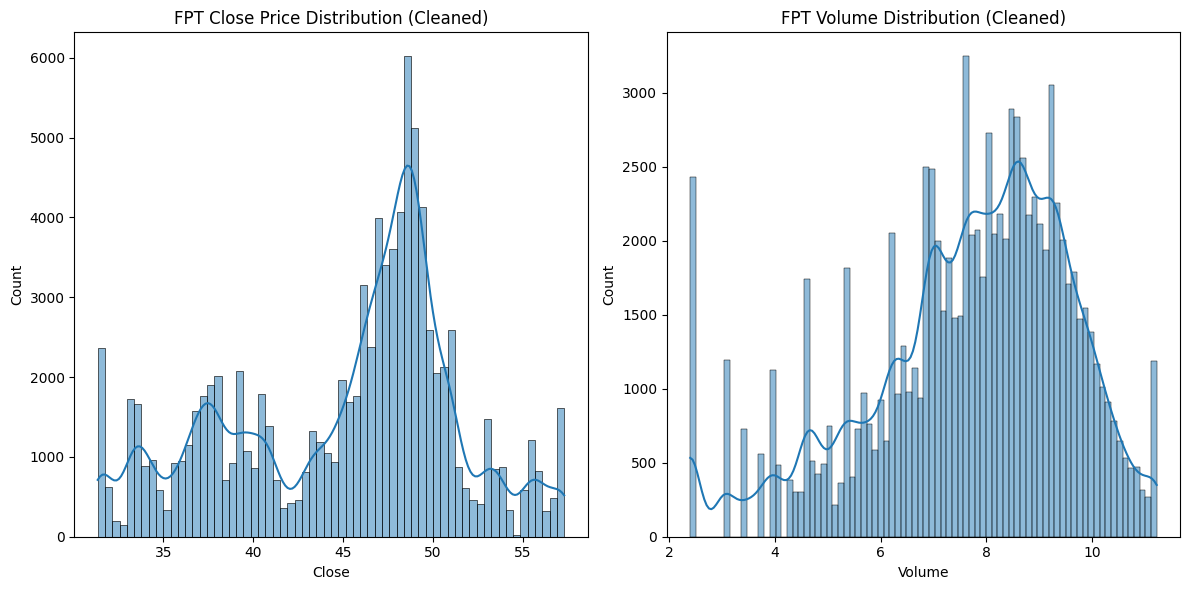

--- VIC ---
Descriptive Statistics after cleaning:


,Close,Volume
count,101266.000000,101266.000000
mean,105.419395,6.632497
std,11.408184,1.887606
min,81.500000,2.397895
25%,95.400000,5.442418
50%,105.300000,6.928538
75%,115.800000,8.006701
max,123.700000,10.220285


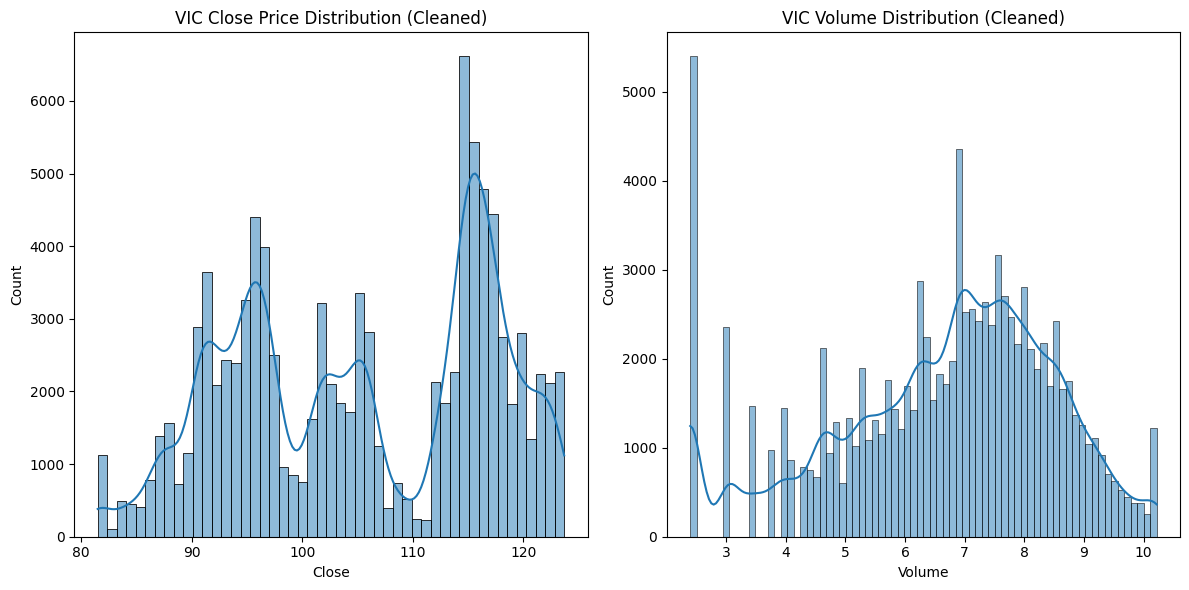

In [14]:
def winsorize_dataframe(df, column_names, limits=(0.01, 0.99)):
    for col in column_names:
      if col == 'Volume':
        df[col] = np.log1p(df[col]) # Thay bằng log(Volume)
      lower_limit = df[col].quantile(limits[0])
      upper_limit = df[col].quantile(limits[1])
      df[col] = np.clip(df[col], lower_limit, upper_limit)
    return df


for df, name in zip(df_company, company_name):
    print(f"--- {name} ---")

    # Winsorize 'Close' and 'Volume'
    df = winsorize_dataframe(df, ['Close', 'Volume'])

    # Handle any newly introduced missing values (unlikely but good practice)
    df.fillna(method='ffill', inplace=True)

    # Data Validation
    print("Descriptive Statistics after cleaning:")
    display(df[['Close', 'Volume']].describe())

    # Visualization
    import matplotlib.pyplot as plt
    import seaborn as sns
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    sns.histplot(df['Close'], kde=True)
    plt.title(f'{name} Close Price Distribution (Cleaned)')
    plt.subplot(1, 2, 2)
    sns.histplot(df['Volume'], kde=True)
    plt.title(f'{name} Volume Distribution (Cleaned)')
    plt.tight_layout()
    plt.show()

## **Feature engineering**



---




*Create more important features for time series forecasting, including daily returns, rolling statistics, target variables, and handle missing values.*


In [15]:
for df, name in zip(df_company, company_name):
    print(f"Processing {name}...")

    # Calculate Daily Returns
    df['Daily_Return'] = df['Close'].pct_change()
    df['Daily_Return'].fillna(0, inplace=True)

    #  Calculate Rolling Statistics
    for window in [5, 10, 20]:
      df[f'Close_MA_{window}'] = df['Close'].rolling(window=window).mean() # Moving average
      df[f'Close_STD_{window}'] = df['Close'].rolling(window=window).std() # Standard deviation

    # Create Target Variable for Close price change of the stock after each

    #  N MINUTES.
    for minute in [1, 5, 10]:
      def add_target_minutes(df, min):
        df = df.copy()
        # Tạo một DataFrame phụ với thời gian lùi N phút (t - N phút) và giá đóng cửa tương ứng
        delta = pd.Timedelta(minutes=min)
        future_df = df[['Date/Time', 'Close']].copy()
        future_df['Date/Time'] = future_df['Date/Time'] - delta   # lùi thời gian đi min phút
        future_df.rename(columns={'Close': f'Close_future_min{min}'}, inplace=True)

        # Ghép (merge) dữ liệu gốc với dữ liệu future dựa trên cột thời gian
        merged = df.merge(future_df, on='Date/Time', how='left')

        # Tính ΔPrice = Close(t+N) - Close(t) sau mỗi min phút tương ứng
        merged[f'Price_Change_min{min}'] = merged[f'Close_future_min{min}'] - merged['Close']
        return  merged[f'Price_Change_min{min}']
      df[f'Price_Change_min{minute}'] = add_target_minutes(df, minute)

    # #  N HOURS
    # for hour in [1, 12, 24]:
    #   def add_target_hours(df, hour):
    #     df = df.copy()
    #     # Tạo một DataFrame phụ với thời gian lùi N phút (t - N giờ) và giá đóng cửa tương ứng
    #     delta = pd.Timedelta(hours=hour)
    #     future_df = df[['Date/Time', 'Close']].copy()
    #     future_df['Date/Time'] = future_df['Date/Time'] - delta   # lùi thời gian đi hour giờ
    #     future_df.rename(columns={'Close': f'Close_future_hour{hour}'}, inplace=True)

    #     # Ghép (merge) dữ liệu gốc với dữ liệu future dựa trên cột thời gian
    #     merged = df.merge(future_df, on='Date/Time', how='left')

    #     # Tính ΔPrice = Close(t+N) - Close(t) sau mỗi giờ tương ứng
    #     merged[f'Price_Change_hour{hour}'] = merged[f'Close_future_hour{hour}'] - merged['Close']
    #     return  merged[f'Price_Change_hour{hour}']
    #   df[f'Price_Change_hour{hour}'] = add_target_hours(df, hour)

    # # N DAYS
    # for day in [7, 30, 365]:
    #   def add_target_days(df, day):
    #     df = df.copy()
    #     # Tạo một DataFrame phụ với thời gian lùi N phút (t - N ngày) và giá đóng cửa tương ứng
    #     delta = pd.Timedelta(days=day)
    #     future_df = df[['Date/Time', 'Close']].copy()
    #     future_df['Date/Time'] = future_df['Date/Time'] - delta
    #     future_df.rename(columns={'Close': f'Close_future_day{day}'}, inplace=True)

    #     # Ghép (merge) dữ liệu gốc với dữ liệu future dựa trên cột thời gian
    #     merged = df.merge(future_df, on='Date/Time', how='left')

    #     # Tính ΔPrice = Close(t+N) - Close(t) sau mỗi ngày tương ứng
    #     merged[f'Price_Change_day{day}'] = merged[f'Close_future_day{day}'] - merged['Close']
    #     return  merged[f'Price_Change_day{day}']
    #   df[f'Price_Change_day{day}'] = add_target_days(df, day)

    #  Remove Rows with NaN Values
    df = df.dropna(inplace=True)
    print(f"Finished processing {name}...")

# Display some of data after feature engineering
for df, name in zip(df_company, company_name):
    print(f"--- {name} ---")
    display(df.head())

Processing PNJ...
Finished processing PNJ...
Processing MSN...
Finished processing MSN...
Processing FPT...
Finished processing FPT...
Processing VIC...
Finished processing VIC...
--- PNJ ---


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Daily_Return,Close_MA_5,Close_STD_5,Close_MA_10,Close_STD_10,Close_MA_20,Close_STD_20,Price_Change_min1,Price_Change_min5,Price_Change_min10
20,PNJ,2018-02-28 09:41:00,78.85,78.85,78.85,78.85,3.828641,0,0.005483,78.972,0.934890,79.023,0.702314,78.7105,0.627673,0.00,-0.24,-0.52
22,PNJ,2018-02-28 09:43:00,78.85,78.85,78.85,78.85,3.784190,0,0.000000,79.116,0.855675,78.915,0.626263,78.7415,0.612461,-0.24,-0.24,-0.62
23,PNJ,2018-02-28 09:44:00,78.61,78.61,78.61,78.61,3.637586,0,-0.003044,78.716,0.195397,78.891,0.633587,78.7650,0.596988,0.00,1.71,-0.28
26,PNJ,2018-02-28 09:48:00,78.61,78.61,78.61,78.61,3.688879,0,0.000000,78.658,0.107331,78.839,0.644816,78.8380,0.538033,1.71,-0.38,-0.28
27,PNJ,2018-02-28 09:49:00,80.32,80.32,80.32,80.32,4.127134,0,0.021753,78.952,0.764735,79.034,0.769938,78.9470,0.605745,-1.90,-1.99,-0.39


--- MSN ---


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Daily_Return,Close_MA_5,Close_STD_5,Close_MA_10,Close_STD_10,Close_MA_20,Close_STD_20,Price_Change_min1,Price_Change_min5,Price_Change_min10
20,MSN,2017-12-25 09:56:00,73.1,73.1,73.1,73.1,9.254453,0,-0.001366,73.22,0.083666,73.22,0.091894,73.210,0.144732,0.1,-0.1,-0.1
23,MSN,2017-12-25 10:00:00,73.0,73.0,73.0,73.0,8.466110,0,-0.001368,73.12,0.083666,73.20,0.105409,73.195,0.127630,0.0,0.0,0.1
24,MSN,2017-12-25 10:01:00,73.0,73.0,73.0,73.0,5.771441,0,0.000000,73.08,0.083666,73.17,0.115950,73.195,0.127630,0.0,0.0,0.1
28,MSN,2017-12-25 10:05:00,73.0,73.0,73.0,73.0,6.552508,0,-0.001368,73.02,0.044721,73.07,0.082327,73.150,0.119208,0.0,0.1,0.3
30,MSN,2017-12-25 10:10:00,73.1,73.1,73.1,73.1,6.216606,0,0.001370,73.04,0.054772,73.05,0.070711,73.135,0.118210,0.0,0.2,0.2


--- FPT ---


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Daily_Return,Close_MA_5,Close_STD_5,Close_MA_10,Close_STD_10,Close_MA_20,Close_STD_20,Price_Change_min1,Price_Change_min5,Price_Change_min10
32,FPT,2018-12-26 09:56:00,31.04,31.04,31.04,31.34,3.044522,0,0.0,31.34,0.0,31.34,0.0,31.34,0.0,0.0,0.0,0.0
35,FPT,2018-12-26 10:01:00,31.19,31.19,31.15,31.34,7.996654,0,0.0,31.34,0.0,31.34,0.0,31.34,0.0,0.0,0.0,0.0
37,FPT,2018-12-26 10:04:00,31.11,31.11,31.11,31.34,9.784760,0,0.0,31.34,0.0,31.34,0.0,31.34,0.0,0.0,0.0,0.0
39,FPT,2018-12-26 10:06:00,31.11,31.11,31.11,31.34,4.394449,0,0.0,31.34,0.0,31.34,0.0,31.34,0.0,0.0,0.0,0.0
42,FPT,2018-12-26 10:11:00,31.11,31.19,31.11,31.34,9.205428,0,0.0,31.34,0.0,31.34,0.0,31.34,0.0,0.0,0.0,0.0


--- VIC ---


,Ticker,Date/Time,Open,High,Low,Close,Volume,Open Interest,Daily_Return,Close_MA_5,Close_STD_5,Close_MA_10,Close_STD_10,Close_MA_20,Close_STD_20,Price_Change_min1,Price_Change_min5,Price_Change_min10
19,VIC,2018-10-17 10:00:00,99.0,99.0,98.8,98.8,9.304832,0,-0.002020,98.76,0.151658,98.68,0.139841,98.675,0.125132,0.2,0.1,0.2
20,VIC,2018-10-17 10:01:00,98.8,99.0,98.8,99.0,8.798002,0,0.002024,98.84,0.151658,98.71,0.172884,98.700,0.137649,0.2,-0.1,0.1
21,VIC,2018-10-17 10:02:00,99.2,99.2,99.2,99.2,9.210440,0,0.002020,98.94,0.194936,98.77,0.226323,98.735,0.169442,0.3,0.3,0.1
22,VIC,2018-10-17 10:03:00,99.5,99.5,99.5,99.5,9.615872,0,0.003024,99.10,0.264575,98.86,0.313404,98.780,0.237531,-0.7,-0.5,-0.1
23,VIC,2018-10-17 10:04:00,99.5,99.5,98.8,98.8,10.166659,0,-0.007035,99.06,0.296648,98.88,0.301109,98.790,0.233734,0.1,0.2,0.4


## **Data splitting**





---
> ***Here, we'll predict Price_Change after every 1 minute***


In [16]:
from sklearn.model_selection import train_test_split

for df, name in zip(df_company, company_name):
    # Define features (X) and target (y)
    target_column = 'Price_Change_min1' # Predict the price changes after N=1 minutes
    X = df.drop(columns=['Date/Time', 'Ticker', target_column])
    y = df[target_column]

    # Split data into training (70%), validation (15%), and testing (15%) sets
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, shuffle=False)
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.1765, shuffle=False) # 0.1765 * 0.85 = 0.15

    # Store the splits in appropriately named variables
    globals()[f'X_train_{name}'] = X_train
    globals()[f'y_train_{name}'] = y_train
    globals()[f'X_val_{name}'] = X_val
    globals()[f'y_val_{name}'] = y_val
    globals()[f'X_test_{name}'] = X_test
    globals()[f'y_test_{name}'] = y_test

    # Inspect the shapes of the resulting sets
    print(f"--- {name.upper()} ---")
    print(f"X_train shape: {X_train.shape}")
    print(f"y_train shape: {y_train.shape}")
    print(f"X_val shape: {X_val.shape}")
    print(f"y_val shape: {y_val.shape}")
    print(f"X_test shape: {X_test.shape}")
    print(f"y_test shape: {y_test.shape}")

--- PNJ ---
X_train shape: (46907, 15)
y_train shape: (46907,)
X_val shape: (10054, 15)
y_val shape: (10054,)
X_test shape: (10052, 15)
y_test shape: (10052,)
--- MSN ---
X_train shape: (54787, 15)
y_train shape: (54787,)
X_val shape: (11743, 15)
y_val shape: (11743,)
X_test shape: (11741, 15)
y_test shape: (11741,)
--- FPT ---
X_train shape: (45877, 15)
y_train shape: (45877,)
X_val shape: (9833, 15)
y_val shape: (9833,)
X_test shape: (9832, 15)
y_test shape: (9832,)
--- VIC ---
X_train shape: (40772, 15)
y_train shape: (40772,)
X_val shape: (8739, 15)
y_val shape: (8739,)
X_test shape: (8738, 15)
y_test shape: (8738,)


## **Model training**


---



Chúng ta thử nghiệm 4 loại mô hình cho bài toán dự báo ΔPrice:

  * **Random Forest (RFR)** – một mô hình ensemble dạng bagging của cây quyết định: phù hợp cho dữ liệu tabular, có khả năng biểu diễn quan hệ phi tuyến, kháng overfit tốt khi số cây lớn, ít cần chuẩn hóa đặc trưng và cho phép trích xuất tầm quan trọng của feature.

  * **XGBoost (XGB Regressor)** – mô hình boosting mạnh mẽ, thường đạt kết quả cao trong các bài toán tabular. XGBoost có khả năng phát hiện quan hệ phức tạp, hỗ trợ nhiều tùy chỉnh/hyperparameter (độ sâu cây, learning rate, regularization…) nên có thể cần tinh chỉnh kỹ nhưng thường cho độ chính xác dự báo cao.

  * **Gradient Boosting Regressor (GBR)** – một mô hình ensemble dạng boosting, hoạt động bằng cách kết hợp nhiều cây quyết định yếu thành một mô hình mạnh. GBR học từ sai sót của các cây trước đó, dần dần cải thiện khả năng dự đoán. Nó thường cho kết quả tốt với dữ liệu dạng bảng và có thể xử lý được các quan hệ phức tạp giữa các biến. Tuy nhiên, GBR cũng có thể dễ bị overfitting nếu không được tinh chỉnh cẩn thận.

  * **LSTM (Long Short-Term Memory)** – mạng nơ-ron hồi quy chuỗi đặc biệt thích hợp cho dữ liệu tuần tự thời gian. LSTM có cơ chế ghi nhớ dài hạn và ngắn hạn, có thể học được các mẫu dao động tuần hoàn hay sự phụ thuộc dài trong chuỗi giá. Mô hình LSTM yêu cầu định dạng dữ liệu khác (3 chiều: [batch, time_steps, features]) và thời gian huấn luyện lâu hơn, nhưng đáng thử nếu muốn nắm bắt động thái thị trường mà mô hình tree-based có thể bỏ lỡ (ví dụ hiệu ứng chuỗi nhiều ngày).


---



> **Ngoài ra, chúng ta sử dụng tập validation để chọn ra và lưu các best_model ứng với 4 loại cổ phiếu.**

> **Các best model được lưu phụ thuộc vào MAE min.**


---



In [23]:
import os
import joblib
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from xgboost import XGBRegressor
import numpy as np

models = {
    'lr': LinearRegression(),
    'rf': RandomForestRegressor(random_state=42),
    'gb': GradientBoostingRegressor(random_state=42),
    'xgb': XGBRegressor(random_state=42)
}

best_models = {} # Store the best models
results = {}

# Create the 'saved_models' directory if it doesn't exist
if not os.path.exists('saved_models'):
    os.makedirs('saved_models')

for company in company_name:
    best_models[company] = None
    results[company] = {}
    best_mae = float('inf')
    best_model = None
    best_model_name = ''
    for model_name, model in models.items():
        X_train = globals()[f'X_train_{company}']
        y_train = globals()[f'y_train_{company}']
        X_val = globals()[f'X_val_{company}']
        y_val = globals()[f'y_val_{company}']

        # Train the model
        model.fit(X_train, y_train)

        # Make predictions on validation set
        predictions = model.predict(X_val)

        # Evaluate the model
        mae = mean_absolute_error(y_val, predictions)
        rmse = np.sqrt(mean_squared_error(y_val, predictions))

        results[company][model_name] = {
            'mae': mae,
            'rmse': rmse
            }

        print(f"--- {company.upper()} - {model_name.upper()} ---")
        print(f"MAE: {mae}")
        print(f"RMSE: {rmse}")

        # Find and update the best  model
        if mae < best_mae:
            best_mae = mae
            # Save the best model
            best_model= model
            best_model_name = model_name

    # Save the best models for each corresponding company (PNJ, MSN, FPT, VIC) into a dumped joblib file
    best_models[company] = best_model
    model_filename = f'saved_models/{company}_{best_model_name}_best_model.joblib'
    joblib.dump(best_model, model_filename)
    print(f"The best model for {company.upper()}: {best_model_name} is saved into {model_filename}\n")

--- PNJ - LR ---
MAE: 0.07615908826880613
RMSE: 0.11476167190424194
--- PNJ - RF ---
MAE: 0.06210867316490947
RMSE: 0.09639933808450699
--- PNJ - GB ---
MAE: 0.057379310050049696
RMSE: 0.09002880792067171
--- PNJ - XGB ---
MAE: 0.05846484369406214
RMSE: 0.09287042088362615
The best model for PNJ: gb is saved into saved_models/PNJ_gb_best_model.joblib

--- MSN - LR ---
MAE: 0.05680811035230949
RMSE: 0.08902928575478333
--- MSN - RF ---
MAE: 0.059556352720769735
RMSE: 0.09273869212142646
--- MSN - GB ---
MAE: 0.05692828473754327
RMSE: 0.0893249341102371
--- MSN - XGB ---
MAE: 0.05731173749213986
RMSE: 0.09080140044296223
The best model for MSN: lr is saved into saved_models/MSN_lr_best_model.joblib

--- FPT - LR ---
MAE: 0.030293769672324333
RMSE: 0.043681769177069535
--- FPT - RF ---
MAE: 0.03238914166581925
RMSE: 0.04506248128382309
--- FPT - GB ---
MAE: 0.03057484175450503
RMSE: 0.043841917992738406
--- FPT - XGB ---
MAE: 0.031513128004963635
RMSE: 0.044941460741746764
The best model 

## **Model Evaluation:**

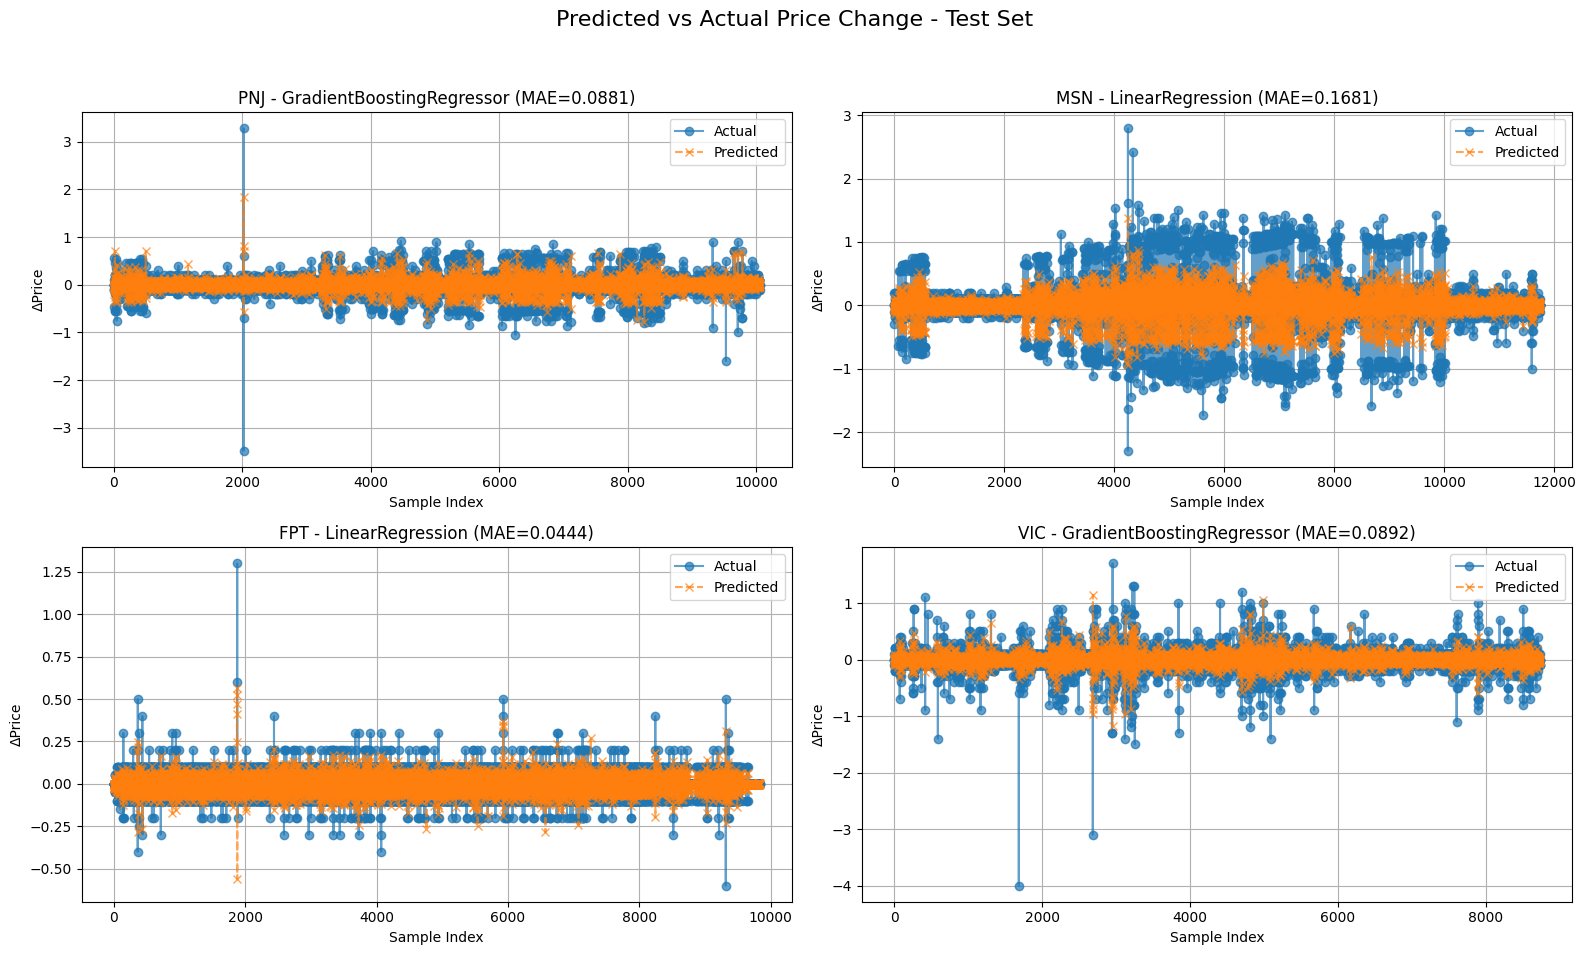

In [25]:
# # Model Evaluation
# for company in company_name:
#     print(f"\n--- Model Evaluation for {company.upper()} ---")

#     best_model = best_models[company]  # Load the best model for each corresponding company
#     model_name = best_model.__class__.__name__

#     X_test = globals()[f'X_test_{company}']
#     y_test = globals()[f'y_test_{company}']

#     # Dự đoán
#     test_predictions = best_model.predict(X_test)

#     # Đánh giá
#     mae = mean_absolute_error(y_test, test_predictions)
#     rmse = np.sqrt(mean_squared_error(y_test, test_predictions))

#     print(f"\nBest Model: {model_name}")
#     print(f"MAE on Test Set: {mae}")
#     print(f"RMSE on Test Set: {rmse}")

#     # Biểu đồ Predicted vs Actual
#     plt.figure(figsize=(10, 6))
#     plt.plot(y_test.values, label='Actual', marker='o')
#     plt.plot(test_predictions, label='Predicted', marker='x')
#     plt.title(f'{company.upper()} - {model_name} - Predicted vs. Actual Price Change')
#     plt.xlabel('Sample Index')
#     plt.ylabel('Price Change')
#     plt.legend()
#     plt.grid(True)
#     plt.show()


# Thiết lập biểu đồ gộp 2x2 cho 4 công ty
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle('Predicted vs Actual Price Change - Test Set', fontsize=16)

for idx, company in enumerate(company_name):
    row, col = divmod(idx, 2)
    ax = axes[row][col]

    best_model = best_models[company]
    model_name = best_model.__class__.__name__

    X_test = globals()[f'X_test_{company}']
    y_test = globals()[f'y_test_{company}']
    predictions = best_model.predict(X_test)

    # Tính MAE để hiển thị trong tiêu đề
    mae = mean_absolute_error(y_test, predictions)

    ax.plot(y_test.values, label='Actual', linestyle='-', marker='o', alpha=0.7)
    ax.plot(predictions, label='Predicted', linestyle='--', marker='x', alpha=0.7)
    ax.set_title(f'{company} - {model_name} (MAE={mae:.4f})', fontsize=12)
    ax.set_xlabel('Sample Index')
    ax.set_ylabel('ΔPrice')
    ax.grid(True)
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



---
📈 Phân tích biểu đồ


---


➤ PNJ – GBoosting (MAE = 0.0881)

* Dự đoán tương đối tốt và ổn định.
* Tuy nhiên có một vài điểm leap (spike) mà mô hình không theo kịp — có thể là những ngày có tin tức bất thường (sự kiện).
* Gradient Boosting hoạt động ổn vì học được các quan hệ phi tuyến giữa feature và ΔPrice.

➤ MSN – Linear Regression (MAE = 0.1681)
* Sai số cao nhất trong 4 công ty.
* Biểu đồ cho thấy mô hình thường bị lệch hẳn về phía dưới trong nhiều đoạn → mô hình đơn giản (Linear Regression) không học tốt những biến động phức tạp.
* Có thể MSN là cổ phiếu có biến động lớn, độ nhiễu cao, hoặc chứa quan hệ phi tuyến không thể hiện rõ qua các đặc trưng hiện tại.

➤ FPT – Linear Regression (MAE = 0.0444)
* Dự đoán tốt nhất trong 4 cổ phiếu.
* Biểu đồ rất ổn định, ít lệch, biến động ΔPrice nhỏ và dễ mô hình hóa.
* Điều này cho thấy thị giá của FPT có mức biến động ổn định và dễ dự đoán qua đặc trưng hiện có.

➤ VIC – Gradient Boosting (MAE = 0.0892)
* Dự đoán tương đối tốt với một vài outlier.
* Biểu đồ dự đoán khá bám sát đường thực tế — cho thấy Gradient Boosting học tốt cấu trúc dữ liệu VIC.




---

